<a href="https://colab.research.google.com/github/yexf308/AppliedStochasticProcess/blob/main/Lect1/Lect_1_Posterior_predictive_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%pylab inline 
from scipy import linalg
from itertools import combinations
import scipy
from scipy.stats import multivariate_normal

import time
from sklearn.linear_model import Ridge

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Generate Data

In [16]:
polydeg = 2  # Degree of design matrix
alph = 0.001  # Alpha of ridge regression
num_samples = 10  # Number of sample coefficients to draw and use for prediction
visibility = 0.5  # Transparency of plotted lines - in case we wish to plot a bunch.

xtrain = np.array([-3, -2, 0, 2, 3])
xtest = np.linspace(-7, 7, 141)
sigma2 = 25

def fun(x):
    return 10 + x + x**2

ytrain = fun(xtrain) + np.random.normal( [xtrain.shape[0]]) * np.sqrt(sigma2)
ytest = fun(xtest) + np.random.normal([xtest.shape[0]]) * np.sqrt(sigma2)


In [5]:
def poly_basis(x, deg):
    # Expands a vector to a polynomial design matrix: from a constant to the deg-power
    return np.column_stack([x**deg for deg in range(0, deg + 1)])

## Train both models

In [17]:
xtrainp = poly_basis(xtrain, polydeg)
xtestp = poly_basis(xtest, polydeg)

# Declare and fit linear regression model
linreg = Ridge(alpha=alph, fit_intercept=False)
linreg.fit(xtrainp, ytrain)

# method 1: MLE
# Determine coefficient distribution
wmle = linreg.coef_
wcov = sigma2 * np.linalg.inv(np.diag(np.array([alph] * (polydeg + 1))) + xtrainp.T.dot(xtrainp))

ypred_mle = linreg.predict(xtestp)  # MLE prediction
noise_mle = np.var(ytrain - linreg.predict(xtrainp), ddof=(polydeg + 1))  # MLE noise estimation


# method 2: posterior predictive 
posterior_bayes = multivariate_normal(mean=wmle, cov=wcov)
samples = posterior_bayes.rvs(num_samples)

# Sample predictions according to samples of coefficients
prediction_samples = xtestp.dot(samples.T)


## MLE 


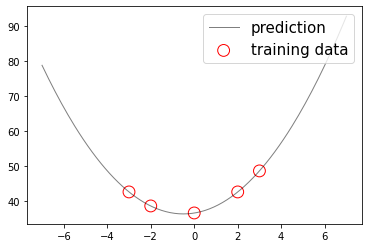

In [23]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, s=140, facecolors="none", edgecolors="r", label="training data")
ax.plot(xtest,ypred_mle, color="k", linewidth=1.0, label="prediction", alpha=visibility)
plt.legend(loc=1, prop={"size": 15})
plt.show()

## posterior predictive 
### functions sampled from plugin approximation to posterior

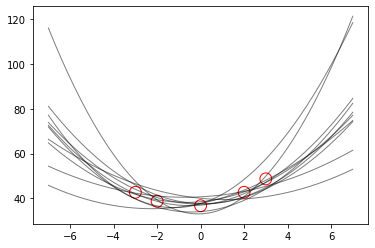

In [25]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, s=140, facecolors="none", edgecolors="r", label="training data")
for j in range(prediction_samples.shape[1]):
  ax.plot(xtest, prediction_samples[:, j], color="k", linewidth=1.0, label="prediction", alpha=visibility)
plt.show()